In [9]:
import pandas as pd
import glob
import os
import pdb
# use your path
all_files = glob.glob('/home/p/pbryant/pfs/results/CATH/20190606/*/*_ind_str_seq.tsv')     # advisable to use os.path.join as this makes concatenation OS independent

df_from_each_file = [pd.read_csv(f, sep='\t') for f in all_files]
for dataframe, filename in zip(df_from_each_file, all_files):
    hgroup = filename.split('/')[-2]
    dataframe['H_group'] = filename.split('/')[-2]
    dataframe['C.'] = hgroup.split('.')[0]+'.'
    dataframe['C.A.'] = hgroup.split('.')[0]+'.'+hgroup.split('.')[1]
concatenated_df   = pd.concat(df_from_each_file, ignore_index=True)

#Join with previous df
#Written to csv
#This df has MLAAdist below 6 already
complete_df = pd.read_csv('/home/p/pbryant/pfs/evolution/visual/complete_df.csv')
complete_df = pd.merge(complete_df, concatenated_df, on=['uid1', 'uid2'], how='left')

#complete_df.to_csv('complete_df_ind.csv',index=False)


In [10]:
print(complete_df.head())
len(complete_df.index)

      uid1     uid2  MLAAdist_x  RMSD_x  TMscore_high_x  TMscore_low_x  \
0  2rc3C00  5k24C00     2.86903    5.42         0.45996        0.44367   
1  3lhhA01  4fryB00     2.50084   17.73         0.14773        0.12625   
2  3l2bA01  2yzqA01     2.22324   14.74         0.18002        0.16634   
3  3lhhA01  3oi8A01     1.49612   15.13         0.11439        0.10694   
4  5k24C00  2yzqA01     2.84098   16.28         0.17813        0.15180   

     H_group_x  C._x  C.A._x  aln_len  identity  \
0  3.10.580.10   3.0     3.1      126      0.13   
1  3.10.580.10   3.0     3.1      102      0.17   
2  3.10.580.10   3.0     3.1      119      0.18   
3  3.10.580.10   3.0     3.1       69      0.33   
4  3.10.580.10   3.0     3.1      120      0.14   

                                            encoding  MLAAdist_y  RMSD_y  \
0  [[13, 6, 7, 8, 12, 11, 16, 19, 11, 8, 10, 10, ...     2.86903    2.45   
1  [[19, 14, 1, 15, 3, 9, 19, 13, 10, 3, 10, 2, 1...     2.50084    2.91   
2  [[10, 11, 19, 5, 

35309

In [17]:
#Filter: concatenated_df[concatenated_df['MLAAdist']<6]
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import seaborn as sns
import numpy as np
#Calculate line of best fit
ML_dists = complete_df['MLAAdist_y']
rmsd_dists = complete_df['RMSD_y']
(slope, intercept, r_value, p_value, std_err) = stats.linregress(ML_dists, rmsd_dists)
print('Slope: ', slope)
print('Intercept: ', intercept)

#Get deviations from line of best fit
deviations = [] #Save deviations
for i in range(0, len(ML_dists)):
    deviation = rmsd_dists[i]-(intercept+slope*ML_dists[i])
    deviations.append(deviation)

#concatenated_df['deviation'] = deviations
#Plot RMSD and ML_dist
below_6 = complete_df[complete_df['MLAAdist_y']<6]
g = sns.jointplot(x="MLAAdist_y", y="RMSD_y", data=complete_df, kind = "hex")
sns.regplot(x="MLAAdist_y", y="RMSD_y", data=complete_df, ax=g.ax_joint, scatter=False)

Slope:  0.572250973691
Intercept:  0.969113416396


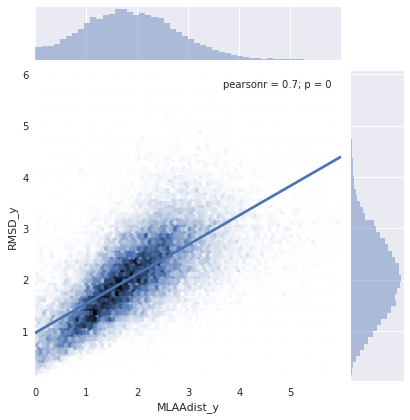

In [18]:
plt.show()

In [12]:
print(max(ML_dists), max(rmsd_dists))


5.9827 6.07


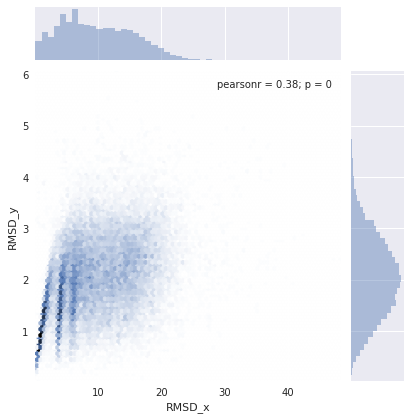

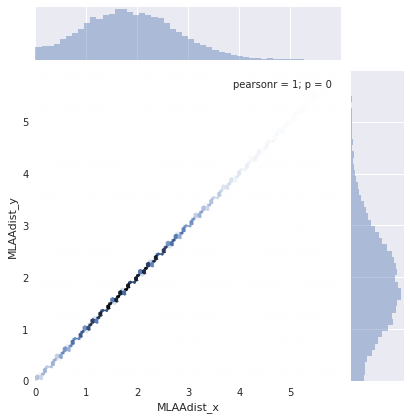

In [22]:
g = sns.jointplot(x="RMSD_x", y="RMSD_y", data=complete_df, kind = "hex")
g = sns.jointplot(x="MLAAdist_x", y="MLAAdist_y", data=complete_df, kind = "hex")
plt.show()

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import pdb

x = np.asarray(complete_df["MLAAdist_y"])
y = np.asarray(complete_df["TMscore_low_y"])
x = np.clip(x, 0.01, 6)


# INIT FIGURE #################################################################

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# AX1 #########################################################################

xbins = np.linspace(x.min(), x.max(), 70)
ybins = np.linspace(y.min(), y.max(), 70)

hist, xedges, yedges = np.histogram2d(x, y, bins=(xbins, ybins))

# See http://stackoverflow.com/questions/27156381/python-creating-a-2d-histogram-from-a-numpy-matrix

xidx = np.clip(np.digitize(x, xedges), 0, hist.shape[0]-1)
yidx = np.clip(np.digitize(y, yedges), 0, hist.shape[1]-1)
c = hist[xidx, yidx]

sc = ax1.scatter(x, y,
                 c=c,
                 s=5,
                 marker='o',
                 cmap='gnuplot2',
                 linewidth=0,
                 alpha=1)
fig.colorbar(sc, ax=ax1)

ax1.set_xlim(xmin=0)
ax1.set_ylim(ymin=0)
ax1.set_title("Normal scale")

# AX2 #########################################################################

x = np.log10(x)
y = np.log10(y)

xbins = np.linspace(x.min(), x.max(), 70)
ybins = np.linspace(y.min(), y.max(), 70)

hist, xedges, yedges = np.histogram2d(x, y, bins=(xbins, ybins))

# See http://stackoverflow.com/questions/27156381/python-creating-a-2d-histogram-from-a-numpy-matrix

xidx = np.clip(np.digitize(x, xedges), 0, hist.shape[0]-1)
yidx = np.clip(np.digitize(y, yedges), 0, hist.shape[1]-1)
c = hist[xidx, yidx]

sc = ax2.scatter(x, y,
                 c=c,
                 s=5,
                 marker='o',
                 cmap='gnuplot2',
                 linewidth=0,
                 alpha=1)
fig.colorbar(sc, ax=ax2)

# Use "10^n" instead "n" as ticks label
func_formatter = lambda x, pos: r'$10^{{{}}}$'.format(round(float(x), 2))
ax2.xaxis.set_major_formatter(FuncFormatter(func_formatter))
ax2.yaxis.set_major_formatter(FuncFormatter(func_formatter))

ax2.set_title("Log scale")
plt.xlabel("MLAAdist", axes = ax2)
plt.ylabel("TMscore", axes = ax2)


# SHOW AND SAVE FILE ##########################################################

plt.tight_layout()

#plt.savefig("hist2d_scatter_plot_logscale_xy.png")


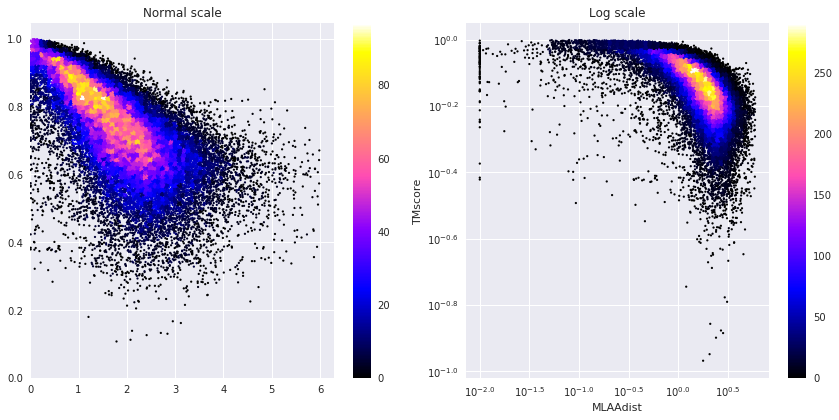

In [30]:
plt.show()

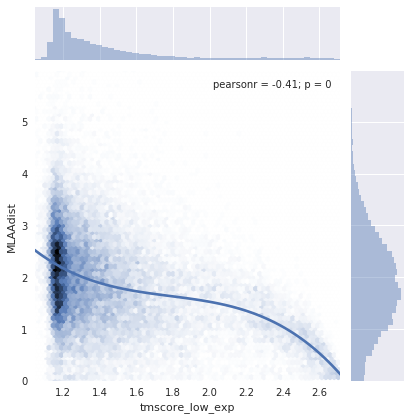

In [38]:
df = pd.DataFrame(list(zip(x, y)), 
               columns =['MLAAdist', 'tmscore_low_exp']) 
g = sns.jointplot(x="tmscore_low_exp", y="MLAAdist", data=df, kind = "hex")
sns.regplot(x="tmscore_low_exp", y="MLAAdist", data=df, ax=g.ax_joint, scatter=False, order = 3)
plt.show()

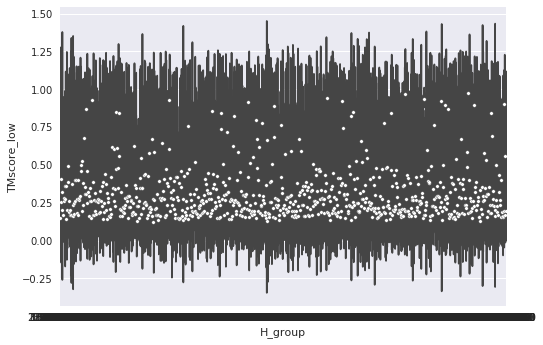

In [68]:
below_6 = concatenated_df[concatenated_df['MLAAdist']<6]
sns.violinplot(x = "H_group", y = "TMscore_low", data = below_6)
plt.show()

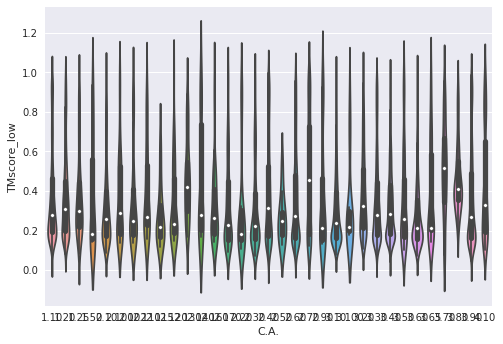

In [71]:
below_6 = concatenated_df[concatenated_df['MLAAdist']<6]
sns.violinplot(x = "C.A.", y = "TMscore_low", data = below_6)
plt.show()

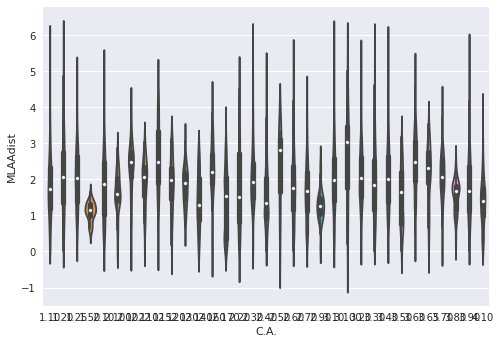

In [73]:
sns.violinplot(x = "C.A.", y = "MLAAdist", data = below_6)
plt.show()

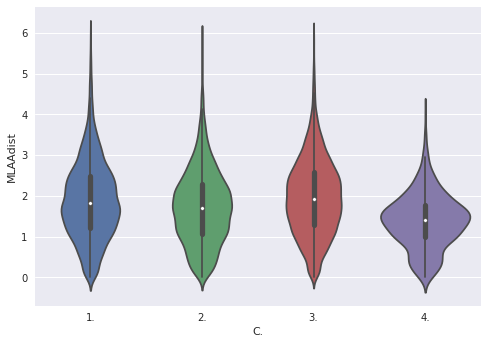

In [68]:
sns.violinplot(x = "C.", y = "MLAAdist", data = below_6)
plt.show()

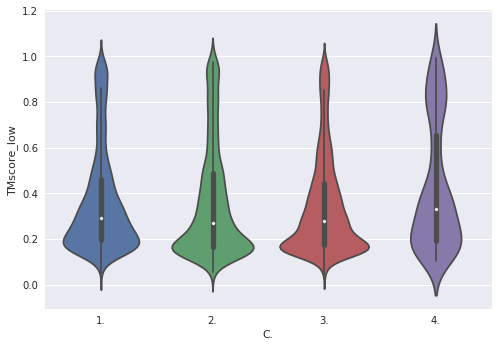

In [69]:
sns.violinplot(x = "C.", y = "TMscore_low", data = below_6)
plt.show()